In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2024-06-20 20:34:47.541770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 20:34:47.541860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 20:34:47.712768: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths
data_dir = '/kaggle/input/arstbdsl/data'
img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator instances for train, validation, and test sets with augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% train and 20% validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 9504 images belonging to 38 classes.
Found 2360 images belonging to 38 classes.


In [3]:
from tensorflow.keras.applications import Xception
# Define the Xception base model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Create three instances of the base model with different inputs
input_1 = base_model.input
output_1 = base_model.output
input_2 = base_model.input
output_2 = base_model.output
input_3 = base_model.input
output_3 = base_model.output

# Add global average pooling layer and dense layers for each model
output_1 = GlobalAveragePooling2D()(output_1)
output_1 = Dense(1024, activation='relu')(output_1)
output_1 = Dropout(0.5)(output_1)
output_1 = Dense(32, activation='relu')(output_1)
output_1 = Dense(38, activation='softmax')(output_1)

output_2 = GlobalAveragePooling2D()(output_2)
output_2 = Dense(1024, activation='relu')(output_2)
output_2 = Dropout(0.5)(output_2)
output_2 = Dense(32, activation='relu')(output_2)
output_2 = Dense(38, activation='softmax')(output_2)

output_3 = GlobalAveragePooling2D()(output_3)
output_3 = Dense(1024, activation='relu')(output_3)
output_3 = Dropout(0.5)(output_3)
output_3 = Dense(32, activation='relu')(output_3)
output_3 = Dense(38, activation='softmax')(output_3)

# Create three separate models
model_1 = Model(inputs=input_1, outputs=output_1)
model_2 = Model(inputs=input_2, outputs=output_2)
model_3 = Model(inputs=input_3, outputs=output_3)

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Train the model
history = model_1.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100


I0000 00:00:1718915786.486669     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718915786.571824     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.0339 - loss: 3.6447

W0000 00:00:1718915960.164736     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718915984.198719     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 280s 667ms/step - accuracy: 0.0339 - loss: 3.6447 - val_accuracy: 0.0767 - val_loss: 3.5719 - learning_rate: 1.0000e-05
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 475ms/step - accuracy: 0.0760 - loss: 3.4898 - val_accuracy: 0.1835 - val_loss: 3.0763 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 474ms/step - accuracy: 0.2267 - loss: 2.9099 - val_accuracy: 0.3983 - val_loss: 2.2497 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 473ms/step - accuracy: 0.4440 - loss: 2.1144 - val_accuracy: 0.5970 - val_loss: 1.5652 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 474ms/step - accuracy: 0.6405 - loss: 1.4582 - val_accuracy: 0.6953 - val_loss: 1.1411 - learning_rate: 1.0000e-05
Epoch 6/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 146s 480ms/step - accuracy: 0.7460 - loss: 1.0529 - val_accuracy: 0.7729 - val_loss: 0.8885 - learning_rate: 1.0000e-05
Epoch 7/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 

In [5]:
# Train the model
history = model_2.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100


W0000 00:00:1718918774.134875     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.2192 - loss: 3.2746

W0000 00:00:1718918909.661855     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 188s 489ms/step - accuracy: 0.2199 - loss: 3.2730 - val_accuracy: 0.7657 - val_loss: 1.6608 - learning_rate: 1.0000e-05
Epoch 2/100


W0000 00:00:1718918919.213827     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 472ms/step - accuracy: 0.7882 - loss: 1.5039 - val_accuracy: 0.8258 - val_loss: 0.8430 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 475ms/step - accuracy: 0.8879 - loss: 0.7017 - val_accuracy: 0.8606 - val_loss: 0.6225 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 477ms/step - accuracy: 0.9317 - loss: 0.4251 - val_accuracy: 0.8720 - val_loss: 0.5386 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 472ms/step - accuracy: 0.9465 - loss: 0.2896 - val_accuracy: 0.8758 - val_loss: 0.4939 - learning_rate: 1.0000e-05
Epoch 6/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 146s 478ms/step - accuracy: 0.9548 - loss: 0.2283 - val_accuracy: 0.8797 - val_loss: 0.4944 - learning_rate: 1.0000e-05
Epoch 7/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 143s 471ms/step - accuracy: 0.9618 - loss: 0.1918 - val_accuracy: 0.8826 - val_loss: 0.4932 - learning_rate: 1.0000e-05
Epoch 8/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 

In [6]:
# Train the model
history = model_3.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


W0000 00:00:1718920550.252915     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.2081 - loss: 3.1533

W0000 00:00:1718920685.519892     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 187s 488ms/step - accuracy: 0.2089 - loss: 3.1515 - val_accuracy: 0.8242 - val_loss: 1.3968 - learning_rate: 1.0000e-05
Epoch 2/100


W0000 00:00:1718920695.070186     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 476ms/step - accuracy: 0.8538 - loss: 1.2347 - val_accuracy: 0.8746 - val_loss: 0.7182 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 474ms/step - accuracy: 0.9321 - loss: 0.5553 - val_accuracy: 0.8805 - val_loss: 0.5660 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 472ms/step - accuracy: 0.9611 - loss: 0.3200 - val_accuracy: 0.8818 - val_loss: 0.5249 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 143s 472ms/step - accuracy: 0.9717 - loss: 0.2155 - val_accuracy: 0.8847 - val_loss: 0.5109 - learning_rate: 1.0000e-05


Found 11864 images belonging to 38 classes.
Model Accuracy: 95.83%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 49s 135ms/step

W0000 00:00:1718921316.372794     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step


W0000 00:00:1718921358.893059     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 96.24%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 47s 128ms/step

W0000 00:00:1718921402.593377     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step


W0000 00:00:1718921444.741310     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 91.82%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 48s 130ms/step

W0000 00:00:1718921488.474520     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step


W0000 00:00:1718921530.698780     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Ensemble Model Accuracy: 0.9628287255563048
Ensemble Model Loss: 0.4774821102619171


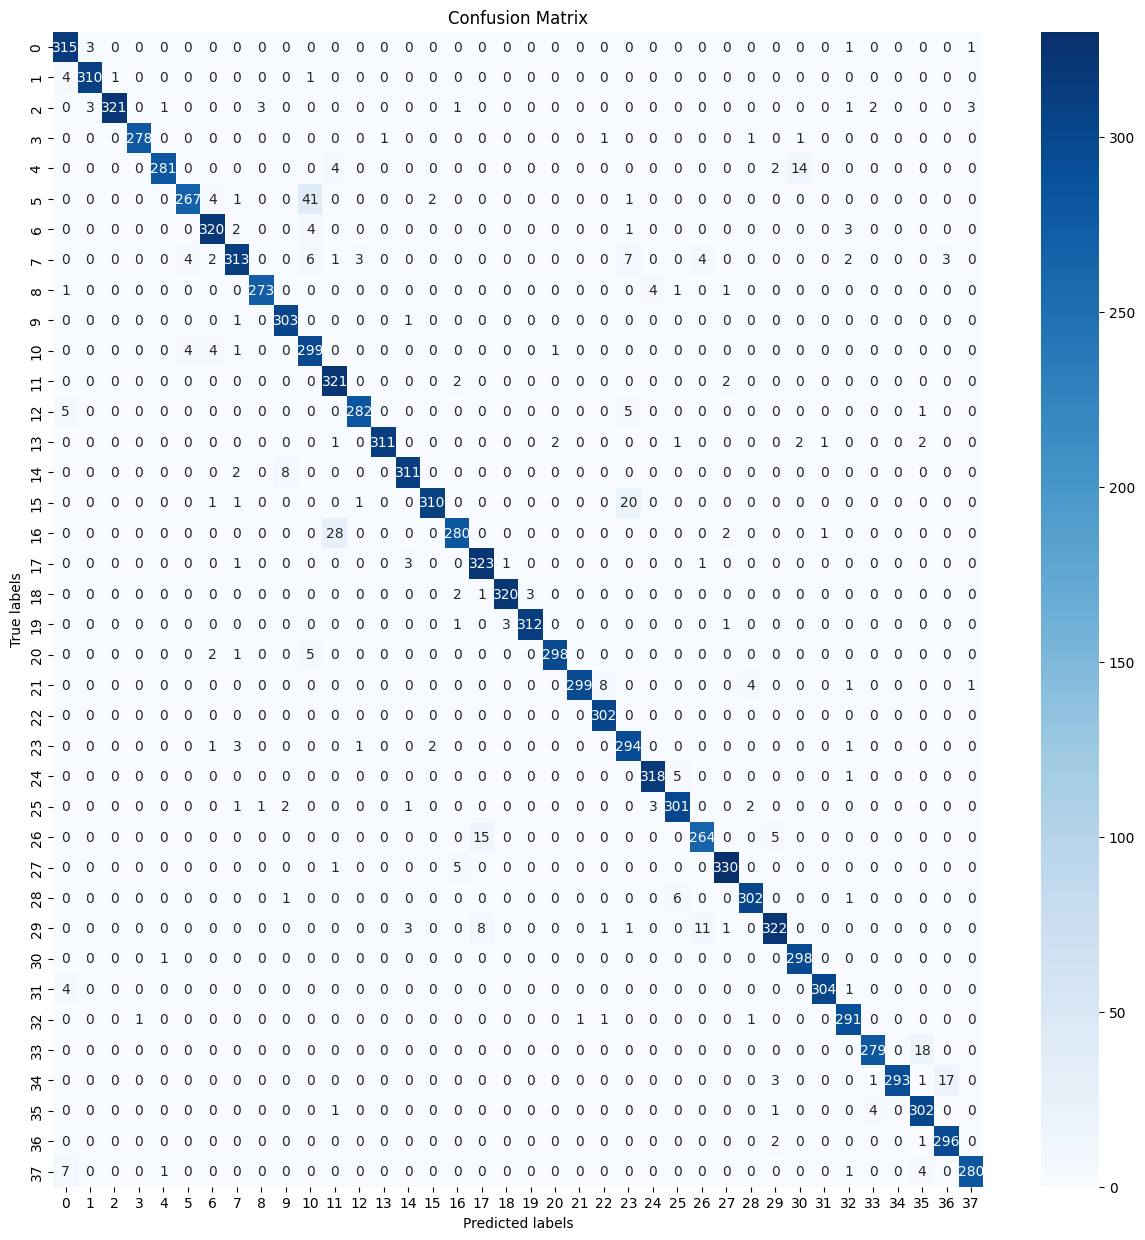

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       320
           1       0.98      0.98      0.98       316
           2       1.00      0.96      0.98       335
           3       1.00      0.99      0.99       282
           4       0.99      0.93      0.96       301
           5       0.97      0.84      0.90       316
           6       0.96      0.97      0.96       330
           7       0.96      0.91      0.93       345
           8       0.99      0.97      0.98       280
           9       0.96      0.99      0.98       305
          10       0.84      0.97      0.90       309
          11       0.90      0.99      0.94       325
          12       0.98      0.96      0.97       293
          13       1.00      0.97      0.98       320
          14       0.97      0.97      0.97       321
          15       0.99      0.93      0.96       333
          16       0.96      0.90      0.93       311
    

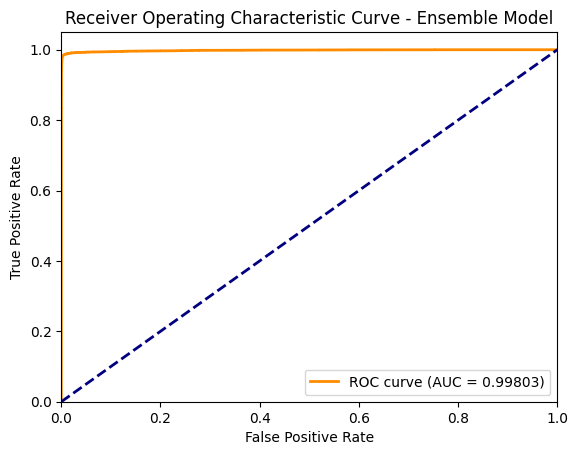

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
import numpy as np
import tensorflow as tf

# Assuming you have multiple models in a list
models = [model_1, model_2, model_3]  # Replace with your actual model variables

# Recheck Data Generators
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/arstbdsl/data',  # Make sure this directory is correct
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency in predictions
)

# Evaluate each model on the test set and average their predictions
ensemble_predictions = None
test_loss = 0

for model in models:
    model_loss, model_acc = model.evaluate(test_generator, verbose=0)
    print(f'Model Accuracy: {model_acc * 100:.2f}%')
    
    # Summing losses for the ensemble
    test_loss += model_loss
    
    predictions = model.predict(test_generator)
    if ensemble_predictions is None:
        ensemble_predictions = predictions
    else:
        ensemble_predictions += predictions

# Average the predictions
ensemble_predictions /= len(models)
test_loss /= len(models)

# Evaluate the ensemble model
y_true = test_generator.classes
y_pred = np.argmax(ensemble_predictions, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Print average loss for the ensemble
print("Ensemble Model Loss:", test_loss)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate overall ROC AUC score
roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), ensemble_predictions, average='macro')
print("Overall ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true).ravel(), ensemble_predictions.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.show()